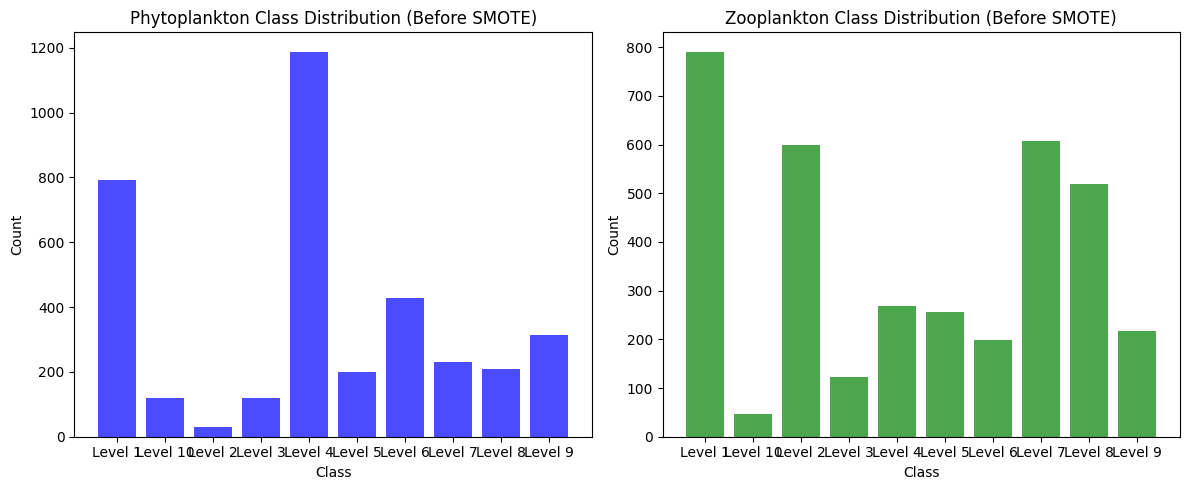

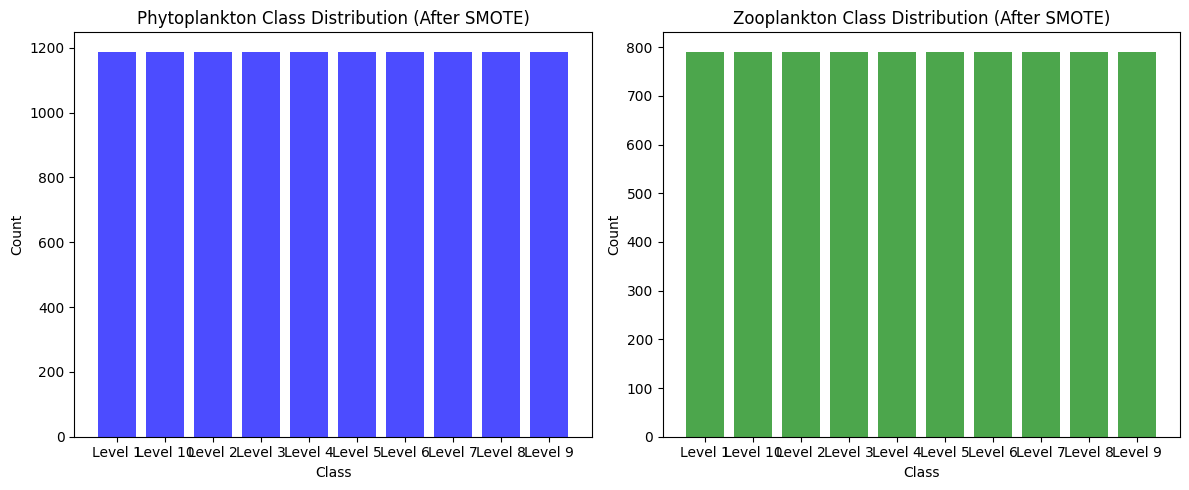

Best parameters for SVM (Phytoplankton): {'C': 10, 'kernel': 'rbf'}
Phytoplankton Classification Report:
              precision    recall  f1-score   support

     Level 1       1.00      1.00      1.00       191
    Level 10       0.68      0.85      0.75        27
     Level 2       0.62      1.00      0.76         8
     Level 3       0.87      0.87      0.87        38
     Level 4       1.00      0.97      0.98       275
     Level 5       0.93      1.00      0.97        57
     Level 6       1.00      0.89      0.94       104
     Level 7       0.66      0.81      0.73        53
     Level 8       0.45      0.29      0.36        51
     Level 9       0.79      0.86      0.82       103

    accuracy                           0.90       907
   macro avg       0.80      0.86      0.82       907
weighted avg       0.90      0.90      0.90       907

Phytoplankton Accuracy: 0.9018743109151047


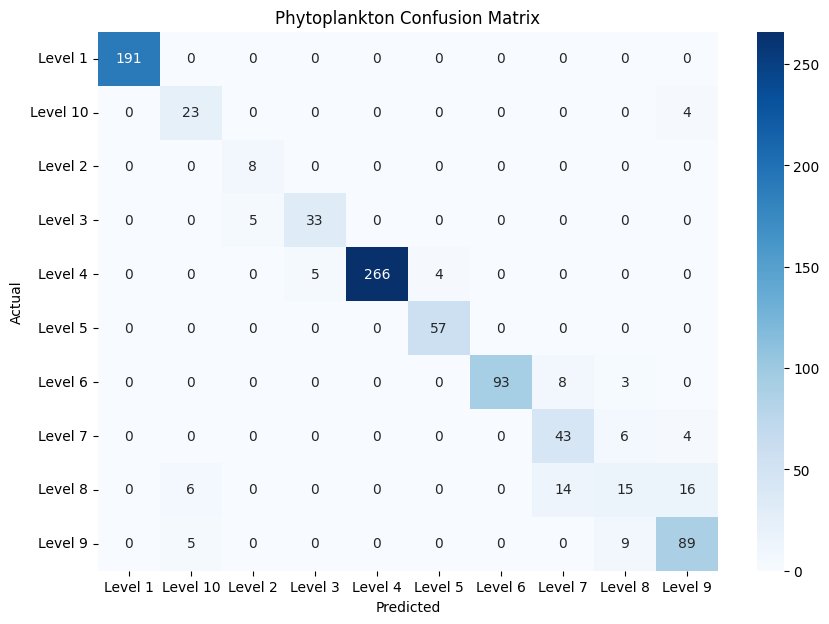

Best parameters for SVM (Zooplankton): {'C': 10, 'kernel': 'rbf'}
Zooplankton Classification Report:
              precision    recall  f1-score   support

     Level 1       1.00      1.00      1.00       191
    Level 10       1.00      1.00      1.00        16
     Level 2       1.00      1.00      1.00       124
     Level 3       1.00      0.89      0.94        28
     Level 4       0.95      0.91      0.93        80
     Level 5       0.85      0.81      0.83        58
     Level 6       0.58      0.93      0.71        44
     Level 7       0.98      0.81      0.88       156
     Level 8       0.90      0.94      0.92       139
     Level 9       0.97      1.00      0.99        71

    accuracy                           0.93       907
   macro avg       0.92      0.93      0.92       907
weighted avg       0.94      0.93      0.93       907

Zooplankton Accuracy: 0.9316427783902976


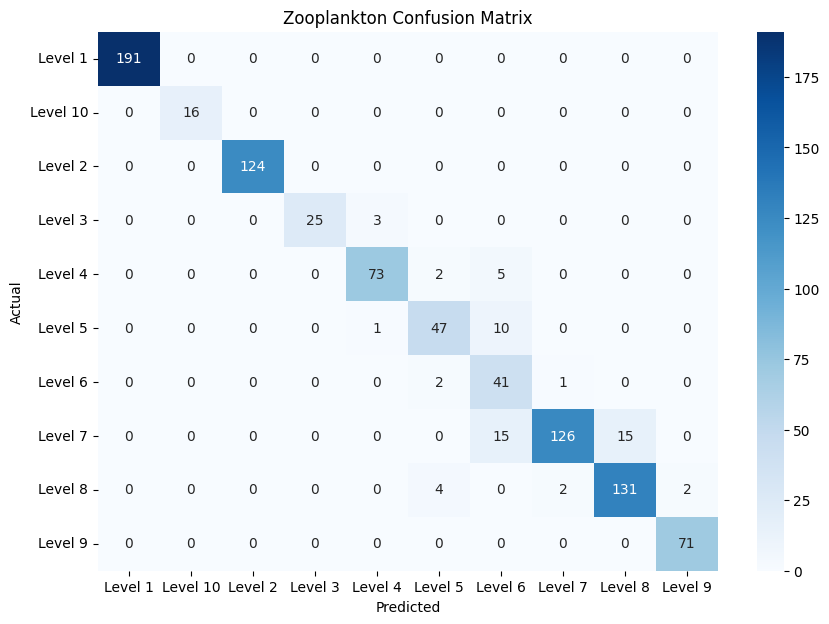

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Load the dataset from the CSV file
df = pd.read_csv('6639leveling.csv')

# Features
X = df[['Temp', 'pH', 'TDS', 'Turbidity', 'DO']]

# Labels
y_phyto = df['Phytoplankton']
y_zoo = df['Zooplankton']

# Encode the labels
le_phyto = LabelEncoder()
le_zoo = LabelEncoder()
y_phyto_encoded = le_phyto.fit_transform(y_phyto)
y_zoo_encoded = le_zoo.fit_transform(y_zoo)

# Split the data into training and testing sets
X_train, X_test, y_phyto_train, y_phyto_test, y_zoo_train, y_zoo_test = train_test_split(
    X, y_phyto_encoded, y_zoo_encoded, test_size=0.2, random_state=42
)

# Count the occurrences of each class before SMOTE (Phytoplankton)
phyto_class_counts_before = np.bincount(y_phyto_train)
zoo_class_counts_before = np.bincount(y_zoo_train)

# Plot class distribution before SMOTE
plt.figure(figsize=(12, 5))

# Phytoplankton class distribution before SMOTE
plt.subplot(1, 2, 1)
plt.bar(range(len(phyto_class_counts_before)), phyto_class_counts_before, color='blue', alpha=0.7)
plt.title('Phytoplankton Class Distribution (Before SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(len(phyto_class_counts_before)), le_phyto.classes_)

# Zooplankton class distribution before SMOTE
plt.subplot(1, 2, 2)
plt.bar(range(len(zoo_class_counts_before)), zoo_class_counts_before, color='green', alpha=0.7)
plt.title('Zooplankton Class Distribution (Before SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(len(zoo_class_counts_before)), le_zoo.classes_)

plt.tight_layout()
plt.show()

# Apply SMOTE to balance the training set for Phytoplankton
smote = SMOTE(random_state=42)
X_train_phyto_smote, y_phyto_train_smote = smote.fit_resample(X_train, y_phyto_train)

# Apply SMOTE to balance the training set for Zooplankton
X_train_zoo_smote, y_zoo_train_smote = smote.fit_resample(X_train, y_zoo_train)

# Count the occurrences of each class after SMOTE
phyto_class_counts_after = np.bincount(y_phyto_train_smote)
zoo_class_counts_after = np.bincount(y_zoo_train_smote)

# Plot class distribution after SMOTE
plt.figure(figsize=(12, 5))

# Phytoplankton class distribution after SMOTE
plt.subplot(1, 2, 1)
plt.bar(range(len(phyto_class_counts_after)), phyto_class_counts_after, color='blue', alpha=0.7)
plt.title('Phytoplankton Class Distribution (After SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(len(phyto_class_counts_after)), le_phyto.classes_)

# Zooplankton class distribution after SMOTE
plt.subplot(1, 2, 2)
plt.bar(range(len(zoo_class_counts_after)), zoo_class_counts_after, color='green', alpha=0.7)
plt.title('Zooplankton Class Distribution (After SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(len(zoo_class_counts_after)), le_zoo.classes_)

plt.tight_layout()
plt.show()

# Scale the features
scaler = StandardScaler()
X_train_phyto_smote = scaler.fit_transform(X_train_phyto_smote)
X_train_zoo_smote = scaler.transform(X_train_zoo_smote)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier
svm = SVC(probability=True, random_state=42)

# Hyperparameter tuning for SVM using GridSearchCV
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=5, scoring='accuracy')

# Phytoplankton Model
svm_grid_search.fit(X_train_phyto_smote, y_phyto_train_smote)
best_svm_phyto = svm_grid_search.best_estimator_
print(f"Best parameters for SVM (Phytoplankton): {svm_grid_search.best_params_}")

# Train the best SVM model on the entire training data for Phytoplankton
best_svm_phyto.fit(X_train_phyto_smote, y_phyto_train_smote)

# Predict and evaluate for Phytoplankton
y_phyto_pred = best_svm_phyto.predict(X_test)
print("Phytoplankton Classification Report:")
print(classification_report(y_phyto_test, y_phyto_pred, target_names=le_phyto.classes_))
print("Phytoplankton Accuracy:", accuracy_score(y_phyto_test, y_phyto_pred))

# Confusion matrix for Phytoplankton
cm_phyto = confusion_matrix(y_phyto_test, y_phyto_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_phyto, annot=True, fmt='d', cmap='Blues', xticklabels=le_phyto.classes_, yticklabels=le_phyto.classes_)
plt.title('Phytoplankton Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Zooplankton Model
svm_grid_search.fit(X_train_zoo_smote, y_zoo_train_smote)
best_svm_zoo = svm_grid_search.best_estimator_
print(f"Best parameters for SVM (Zooplankton): {svm_grid_search.best_params_}")

# Train the best SVM model on the entire training data for Zooplankton
best_svm_zoo.fit(X_train_zoo_smote, y_zoo_train_smote)

# Predict and evaluate for Zooplankton
y_zoo_pred = best_svm_zoo.predict(X_test)
print("Zooplankton Classification Report:")
print(classification_report(y_zoo_test, y_zoo_pred, target_names=le_zoo.classes_))
print("Zooplankton Accuracy:", accuracy_score(y_zoo_test, y_zoo_pred))

# Confusion matrix for Zooplankton
cm_zoo = confusion_matrix(y_zoo_test, y_zoo_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_zoo, annot=True, fmt='d', cmap='Blues', xticklabels=le_zoo.classes_, yticklabels=le_zoo.classes_)
plt.title('Zooplankton Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


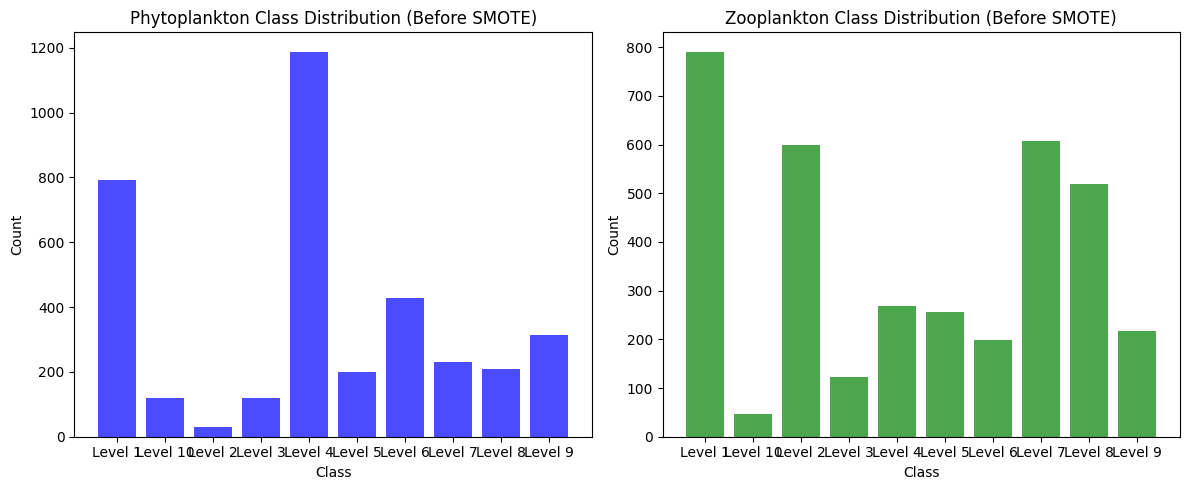

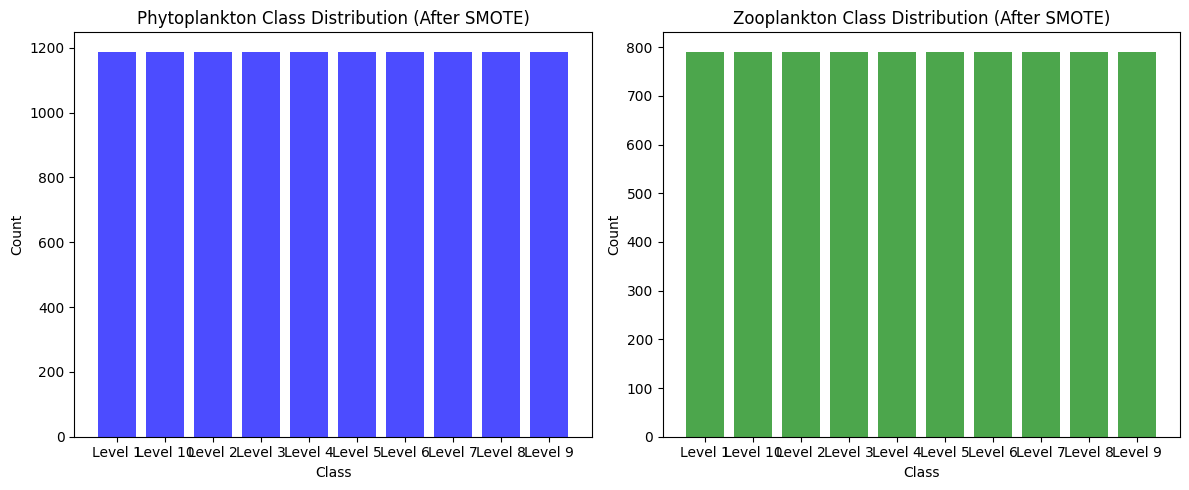

Best parameters for SVM (Phytoplankton): {'C': 10, 'kernel': 'rbf'}
Phytoplankton Classification Report:
              precision    recall  f1-score   support

     Level 1       1.00      1.00      1.00       191
    Level 10       0.68      0.85      0.75        27
     Level 2       0.62      1.00      0.76         8
     Level 3       0.87      0.87      0.87        38
     Level 4       1.00      0.97      0.98       275
     Level 5       0.93      1.00      0.97        57
     Level 6       1.00      0.89      0.94       104
     Level 7       0.66      0.81      0.73        53
     Level 8       0.45      0.29      0.36        51
     Level 9       0.79      0.86      0.82       103

    accuracy                           0.90       907
   macro avg       0.80      0.86      0.82       907
weighted avg       0.90      0.90      0.90       907

Phytoplankton Accuracy: 0.9018743109151047


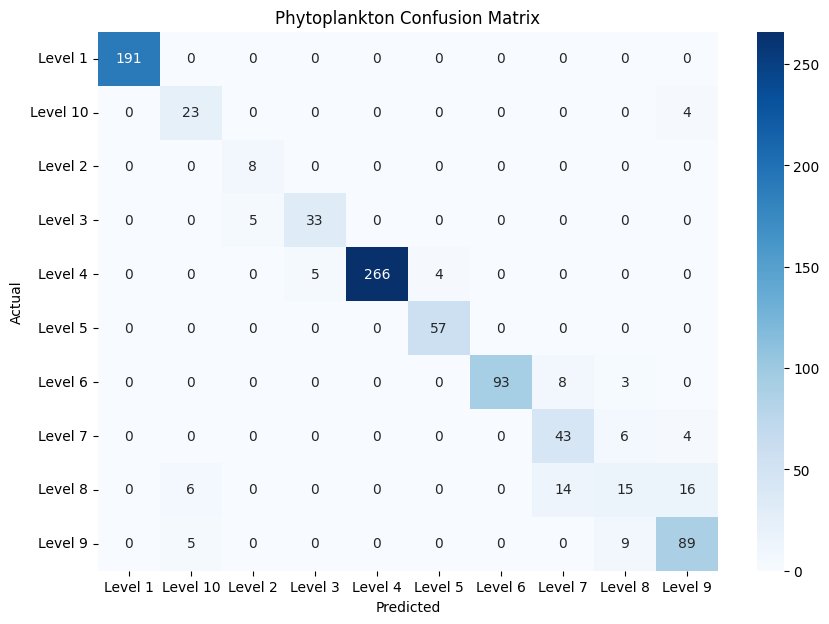

Best parameters for SVM (Zooplankton): {'C': 10, 'kernel': 'rbf'}
Zooplankton Classification Report:
              precision    recall  f1-score   support

     Level 1       1.00      1.00      1.00       191
    Level 10       1.00      1.00      1.00        16
     Level 2       1.00      1.00      1.00       124
     Level 3       1.00      0.89      0.94        28
     Level 4       0.95      0.91      0.93        80
     Level 5       0.85      0.81      0.83        58
     Level 6       0.58      0.93      0.71        44
     Level 7       0.98      0.81      0.88       156
     Level 8       0.90      0.94      0.92       139
     Level 9       0.97      1.00      0.99        71

    accuracy                           0.93       907
   macro avg       0.92      0.93      0.92       907
weighted avg       0.94      0.93      0.93       907

Zooplankton Accuracy: 0.9316427783902976


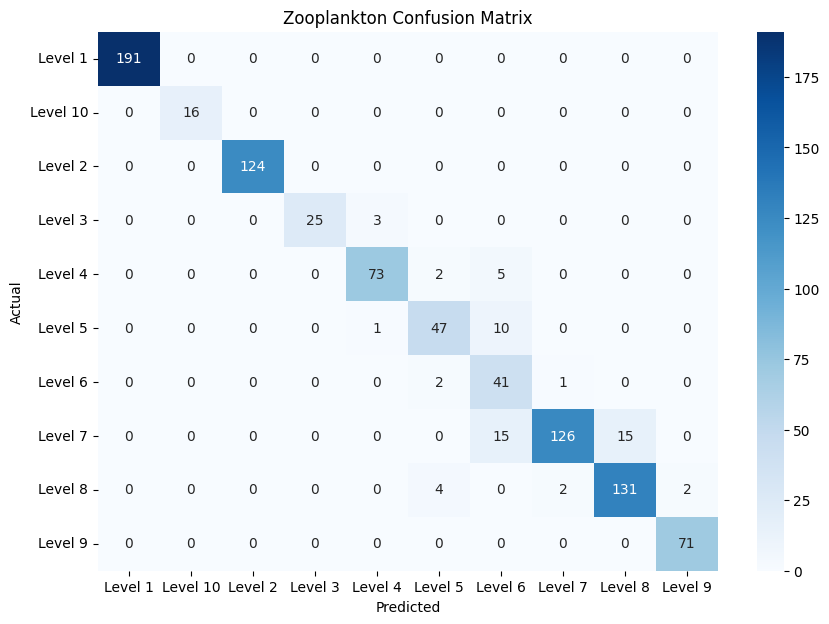

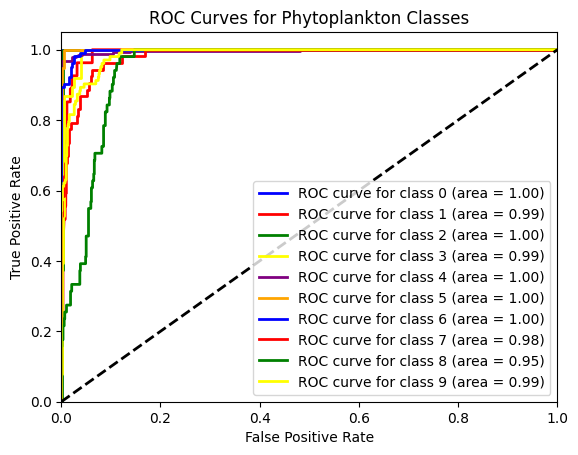

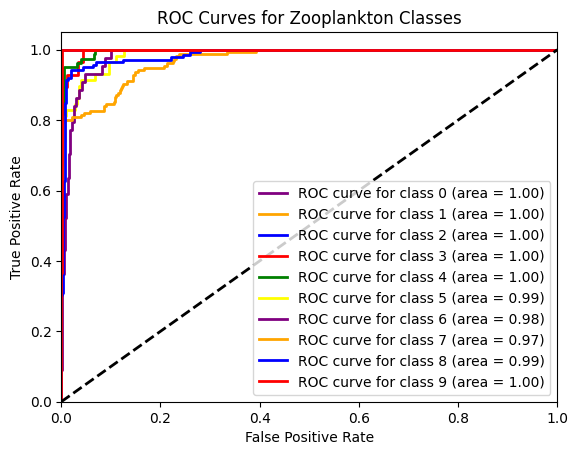

Cross-Validation Accuracy Scores for Phytoplankton (SVM): [0.87247475 0.878367   0.86363636 0.87878788 0.875     ]
Mean CV Accuracy for Phytoplankton (SVM): 0.8737
Cross-Validation Accuracy Scores for Zooplankton (SVM): [0.91340076 0.92288243 0.92541087 0.91972187 0.92983565]
Mean CV Accuracy for Zooplankton (SVM): 0.9223


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Load the dataset from the CSV file
df = pd.read_csv('6639leveling.csv')

# Features
X = df[['Temp', 'pH', 'TDS', 'Turbidity', 'DO']]

# Labels
y_phyto = df['Phytoplankton']
y_zoo = df['Zooplankton']

# Encode the labels
le_phyto = LabelEncoder()
le_zoo = LabelEncoder()
y_phyto_encoded = le_phyto.fit_transform(y_phyto)
y_zoo_encoded = le_zoo.fit_transform(y_zoo)

# Split the data into training and testing sets
X_train, X_test, y_phyto_train, y_phyto_test, y_zoo_train, y_zoo_test = train_test_split(
    X, y_phyto_encoded, y_zoo_encoded, test_size=0.2, random_state=42
)

# Count the occurrences of each class before SMOTE (Phytoplankton)
phyto_class_counts_before = np.bincount(y_phyto_train)
zoo_class_counts_before = np.bincount(y_zoo_train)

# Plot class distribution before SMOTE
plt.figure(figsize=(12, 5))

# Phytoplankton class distribution before SMOTE
plt.subplot(1, 2, 1)
plt.bar(range(len(phyto_class_counts_before)), phyto_class_counts_before, color='blue', alpha=0.7)
plt.title('Phytoplankton Class Distribution (Before SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(len(phyto_class_counts_before)), le_phyto.classes_)

# Zooplankton class distribution before SMOTE
plt.subplot(1, 2, 2)
plt.bar(range(len(zoo_class_counts_before)), zoo_class_counts_before, color='green', alpha=0.7)
plt.title('Zooplankton Class Distribution (Before SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(len(zoo_class_counts_before)), le_zoo.classes_)

plt.tight_layout()
plt.show()

# Apply SMOTE to balance the training set for Phytoplankton
smote = SMOTE(random_state=42)
X_train_phyto_smote, y_phyto_train_smote = smote.fit_resample(X_train, y_phyto_train)

# Apply SMOTE to balance the training set for Zooplankton
X_train_zoo_smote, y_zoo_train_smote = smote.fit_resample(X_train, y_zoo_train)

# Count the occurrences of each class after SMOTE
phyto_class_counts_after = np.bincount(y_phyto_train_smote)
zoo_class_counts_after = np.bincount(y_zoo_train_smote)

# Plot class distribution after SMOTE
plt.figure(figsize=(12, 5))

# Phytoplankton class distribution after SMOTE
plt.subplot(1, 2, 1)
plt.bar(range(len(phyto_class_counts_after)), phyto_class_counts_after, color='blue', alpha=0.7)
plt.title('Phytoplankton Class Distribution (After SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(len(phyto_class_counts_after)), le_phyto.classes_)

# Zooplankton class distribution after SMOTE
plt.subplot(1, 2, 2)
plt.bar(range(len(zoo_class_counts_after)), zoo_class_counts_after, color='green', alpha=0.7)
plt.title('Zooplankton Class Distribution (After SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(len(zoo_class_counts_after)), le_zoo.classes_)

plt.tight_layout()
plt.show()

# Scale the features
scaler = StandardScaler()
X_train_phyto_smote = scaler.fit_transform(X_train_phyto_smote)
X_train_zoo_smote = scaler.transform(X_train_zoo_smote)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier
svm = SVC(probability=True, random_state=42)

# Hyperparameter tuning for SVM using GridSearchCV
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=5, scoring='accuracy')

# Phytoplankton Model
svm_grid_search.fit(X_train_phyto_smote, y_phyto_train_smote)
best_svm_phyto = svm_grid_search.best_estimator_
print(f"Best parameters for SVM (Phytoplankton): {svm_grid_search.best_params_}")

# Train the best SVM model on the entire training data for Phytoplankton
best_svm_phyto.fit(X_train_phyto_smote, y_phyto_train_smote)

# Predict and evaluate for Phytoplankton
y_phyto_pred = best_svm_phyto.predict(X_test)
print("Phytoplankton Classification Report:")
print(classification_report(y_phyto_test, y_phyto_pred, target_names=le_phyto.classes_))
print("Phytoplankton Accuracy:", accuracy_score(y_phyto_test, y_phyto_pred))

# Confusion matrix for Phytoplankton
cm_phyto = confusion_matrix(y_phyto_test, y_phyto_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_phyto, annot=True, fmt='d', cmap='Blues', xticklabels=le_phyto.classes_, yticklabels=le_phyto.classes_)
plt.title('Phytoplankton Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Zooplankton Model
svm_grid_search.fit(X_train_zoo_smote, y_zoo_train_smote)
best_svm_zoo = svm_grid_search.best_estimator_
print(f"Best parameters for SVM (Zooplankton): {svm_grid_search.best_params_}")

# Train the best SVM model on the entire training data for Zooplankton
best_svm_zoo.fit(X_train_zoo_smote, y_zoo_train_smote)

# Predict and evaluate for Zooplankton
y_zoo_pred = best_svm_zoo.predict(X_test)
print("Zooplankton Classification Report:")
print(classification_report(y_zoo_test, y_zoo_pred, target_names=le_zoo.classes_))
print("Zooplankton Accuracy:", accuracy_score(y_zoo_test, y_zoo_pred))

# Confusion matrix for Zooplankton
cm_zoo = confusion_matrix(y_zoo_test, y_zoo_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_zoo, annot=True, fmt='d', cmap='Blues', xticklabels=le_zoo.classes_, yticklabels=le_zoo.classes_)
plt.title('Zooplankton Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Assuming these are already defined and trained: best_svm_phyto and best_svm_zoo
# X_train_phyto_smote, y_phyto_train_smote
# X_train_zoo_smote, y_zoo_train_smote
# X_test, y_phyto_test, y_zoo_test

# Binarize the output labels for ROC curve computation (multi-class, one-vs-rest)
y_phyto_bin = label_binarize(y_phyto_test, classes=np.unique(y_phyto_test))
y_zoo_bin = label_binarize(y_zoo_test, classes=np.unique(y_zoo_test))
n_classes_phyto = y_phyto_bin.shape[1]
n_classes_zoo = y_zoo_bin.shape[1]

# Initialize OneVsRestClassifier for SVM
ovr_svm_phyto = OneVsRestClassifier(best_svm_phyto)
ovr_svm_zoo = OneVsRestClassifier(best_svm_zoo)

# Predict probabilities for ROC curves
y_phyto_prob = ovr_svm_phyto.fit(X_train_phyto_smote, label_binarize(y_phyto_train_smote, classes=np.unique(y_phyto_train_smote))).predict_proba(X_test)
y_zoo_prob = ovr_svm_zoo.fit(X_train_zoo_smote, label_binarize(y_zoo_train_smote, classes=np.unique(y_zoo_train_smote))).predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class for Phytoplankton
fpr_phyto = dict()
tpr_phyto = dict()
roc_auc_phyto = dict()
for i in range(n_classes_phyto):
    fpr_phyto[i], tpr_phyto[i], _ = roc_curve(y_phyto_bin[:, i], y_phyto_prob[:, i])
    roc_auc_phyto[i] = auc(fpr_phyto[i], tpr_phyto[i])

# Plot ROC curves for Phytoplankton
plt.figure()
colors = cycle(['blue', 'red', 'green', 'yellow', 'purple', 'orange'])
for i, color in zip(range(n_classes_phyto), colors):
    plt.plot(fpr_phyto[i], tpr_phyto[i], color=color, lw=2,
             label=f'ROC curve for class {i} (area = {roc_auc_phyto[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Phytoplankton Classes')
plt.legend(loc="lower right")
plt.show()

# Compute ROC curve and ROC AUC for each class for Zooplankton
fpr_zoo = dict()
tpr_zoo = dict()
roc_auc_zoo = dict()
for i in range(n_classes_zoo):
    fpr_zoo[i], tpr_zoo[i], _ = roc_curve(y_zoo_bin[:, i], y_zoo_prob[:, i])
    roc_auc_zoo[i] = auc(fpr_zoo[i], tpr_zoo[i])

# Plot ROC curves for Zooplankton
plt.figure()
for i, color in zip(range(n_classes_zoo), colors):
    plt.plot(fpr_zoo[i], tpr_zoo[i], color=color, lw=2,
             label=f'ROC curve for class {i} (area = {roc_auc_zoo[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Zooplankton Classes')
plt.legend(loc="lower right")
plt.show()

# Cross-validation accuracy for Phytoplankton
cv_phyto_scores = cross_val_score(best_svm_phyto, X_train_phyto_smote, y_phyto_train_smote, cv=5)
print(f"Cross-Validation Accuracy Scores for Phytoplankton (SVM): {cv_phyto_scores}")
print(f"Mean CV Accuracy for Phytoplankton (SVM): {cv_phyto_scores.mean():.4f}")

# Cross-validation accuracy for Zooplankton
cv_zoo_scores = cross_val_score(best_svm_zoo, X_train_zoo_smote, y_zoo_train_smote, cv=5)
print(f"Cross-Validation Accuracy Scores for Zooplankton (SVM): {cv_zoo_scores}")
print(f"Mean CV Accuracy for Zooplankton (SVM): {cv_zoo_scores.mean():.4f}")
